# Przetwarzanie Grafiki i Muzyki - laboratorium nr 8

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Morfologia matematyczna.


W morfologii matematycznej operacje są dwuargumentowe:

  * Pierwszym argumentem jest obraz do przetworzenia.
  * Drugim argumentem jest mniejszy obraz: element strukturalny.

# Erozja

Erozja jest zastosowaniem sumy Minkowskiego do obrazów cyfrowych

  * Pierwszym argumentem jest obraz
  * Drugim element strukturalny
  * Zasada działania:
    * Do każdego piksela obrazu przykłada się element strukturalny (SE) w jego punkcie centralnym
    * Jeśli choć jeden piksel sąsiedztwa przykryty przez SE ma wartość '0', piksel bieżący też przyjmuje wartość '0' (tła)

## Zadanie 1 (1 punkt)

* Proszę dokonać binaryzacji obrazu FIG_512 za pomocą algorytmu Otsu.
* Proszę wykonać erozję na binarnej wersji obrazka z elementami strukturalnymi:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$

$$
\begin{bmatrix} 
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0
\end{bmatrix} 
$$

* Proszę narysować różnice obrazów przed i po erozji (proszę nie pomylić kolejności).

In [4]:
def erode_one(image, kernel):
    return cv2.erode(image, kernel)
    

image = cv2.imread('./img/FIG_512.png', cv2.IMREAD_COLOR)
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
grayscale_image = ycbcr_image[:,:,0]
_, image_binary = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel_3x3 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
kernel_5x5 = np.array([[0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

kernel_3x3_erode = erode_one(image_binary, kernel_3x3)
kernel_5x5_erode = erode_one(image_binary, kernel_5x5)

cv2.imshow("before erode_one", image_binary)
cv2.imshow("after erode_one, 3x3 kernel", kernel_3x3_erode)
cv2.imshow("after erode_one, 5x5 kernel", kernel_5x5_erode)

cv2.waitKey(50)
cv2.destroyAllWindows()

# Zadanie 2 (1 punkt)

* Proszę dokonać binaryzacji obrazu LENA_512 za pomocą algorytmu Otsu.
* Proszę wykonać erozję na binarnej wersji obrazka z elementami strukturalnymi:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$

$$
\begin{bmatrix} 
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix} 
$$

* Proszę narysować różnice obrazów prze i po erozji (proszę nie pomylić kolejności).

In [7]:
kernel_3x3 = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)
kernel_3x3_ones = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]], dtype=np.uint8)

lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)
ycbcr_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2YCrCb)
grayscale_lena = ycbcr_lena[:,:,0]
_, lena_binary = cv2.threshold(grayscale_lena, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel_3x3_lena_erode = erode_one(lena_binary, kernel_3x3)
kernel_3x3_ones_lena_erode = erode_one(lena_binary, kernel_3x3_ones)

cv2.imshow("before erode_one", lena_binary)
cv2.imshow("after erode_one, 3x3 kernel", kernel_3x3_lena_erode)
cv2.imshow("after erode_one, 5x5 kernel", kernel_3x3_ones_lena_erode)

cv2.waitKey(50)
cv2.destroyAllWindows()

# Zadanie 3 (2 punkty)

  * Zdefiniujmy okrągły element strukturalny o promieniu r:
$$
B_r=\{ (x_1,x_2) \in \mathbb{R}^2 \colon x_{1}^2+x_{2}^2<r^2 \}
$$
  * Proszę dokonać binaryzacji obrazu LENA_512 za pomocą algorytmu Otsu, dla $r=2,3,4,5,6,7$

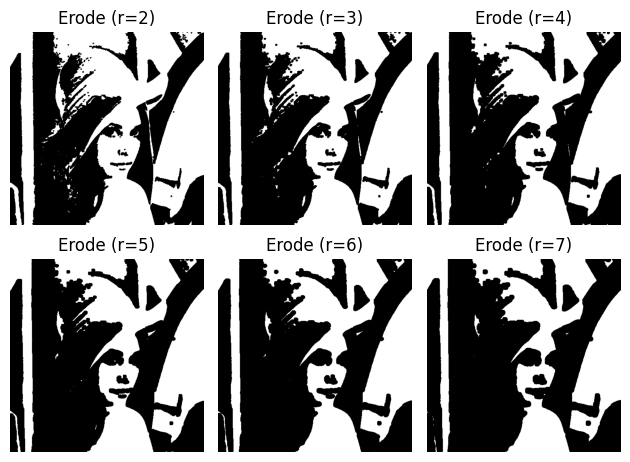

In [13]:
lena_image = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_lena = cv2.threshold(lena_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
r_list = [2, 3, 4, 5, 6, 7]

for i, r in enumerate(r_list, 1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * r, 2 * r))
    eroded_image = cv2.erode(binary_lena, kernel)
    plt.subplot(2, 3, i)
    plt.imshow(eroded_image, cmap='gray')
    plt.title(f'Erode (r={r})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Dylacja

  * Operacja dylacji jest zastosowaniem sumy Minkowskiego do obrazów cyfrowych
  * Pierwszym argumentem jest obraz
  * Drugim element strukturalny
  * Zasada działania:
    * Do każdego piksela obrazu przykłada się element strukturalny (SE) w jego punkcie centralnym
    * Jeśli choć jeden piksel sąsiedztwa przykryty przez SE ma wartość '1', piksel bieżący też przyjmuje wartość '1' (obiektu pierwszoplanowego)


## Zadanie 4 (1 punkt)
Proszę wykonać ćwiczenie 1 dla dylacji.

In [9]:
def dilate_one(image, kernel):
    return cv2.dilate(image, kernel)
    

image = cv2.imread('./img/FIG_512.png', cv2.IMREAD_COLOR)
ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
grayscale_image = ycbcr_image[:,:,0]
_, image_binary = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel_3x3 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
kernel_5x5 = np.array([[0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

kernel_3x3_dilate = dilate_one(image_binary, kernel_3x3)
kernel_5x5_dilate = dilate_one(image_binary, kernel_5x5)

cv2.imshow("before dilate_one", image_binary)
cv2.imshow("after dilate_one, 3x3 kernel", kernel_3x3_dilate)
cv2.imshow("after dilate_one, 5x5 kernel", kernel_5x5_dilate)

cv2.waitKey(50)
cv2.destroyAllWindows()

## Zadanie 5 (1 punkt)
Proszę wykonać ćwiczenie 2 dla dylacji.

In [10]:
kernel_3x3 = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)
kernel_3x3_ones = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]], dtype=np.uint8)

lena = cv2.imread("./img/LENA_512.jpg", cv2.IMREAD_COLOR)
ycbcr_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2YCrCb)
grayscale_lena = ycbcr_lena[:,:,0]
_, lena_binary = cv2.threshold(grayscale_lena, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel_3x3_lena_dilate = dilate_one(lena_binary, kernel_3x3)
kernel_3x3_ones_lena_dilate = dilate_one(lena_binary, kernel_3x3_ones)

cv2.imshow("before dilate_one", lena_binary)
cv2.imshow("after dilate_one, 3x3 kernel", kernel_3x3_lena_dilate)
cv2.imshow("after dilate_one, 5x5 kernel", kernel_3x3_ones_lena_dilate)

cv2.waitKey(50)
cv2.destroyAllWindows()

# Operacja otwarcia i zamknięcia

## Zadanie 6 (1 punkt)
Proszę wykonać operację otwarcia na FIG_512 (najpierw erozja, a potem dylacja), dla okrągłego elementu strukturalnego o promieniach r=2,5,7,20.


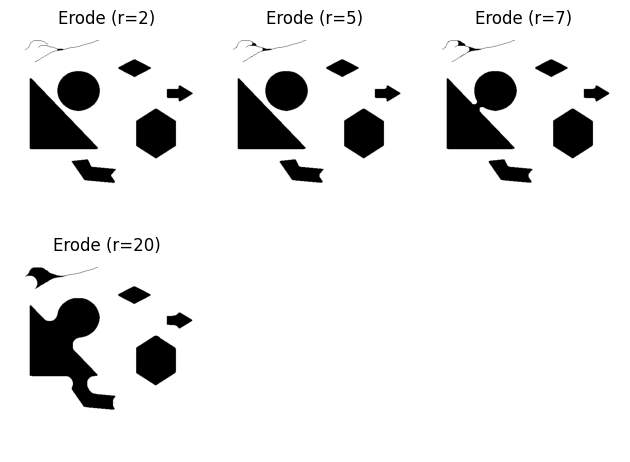

In [14]:
image = cv2.imread('./img/FIG_512.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
r_list = [2, 5, 7, 20]

for i, r in enumerate(r_list, 1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * r, 2 * r))
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    plt.subplot(2, 3, i)
    plt.imshow(opened_image, cmap='gray')
    plt.title(f'Erode (r={r})')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Zadanie 7 (1 punkt)
Proszę wykonać operację zamknięcia na FIG_512 (najpierw dylacja, potem erozja), dla okrągłego elementu strukturalnego o promieniach r=2,5,7,20.

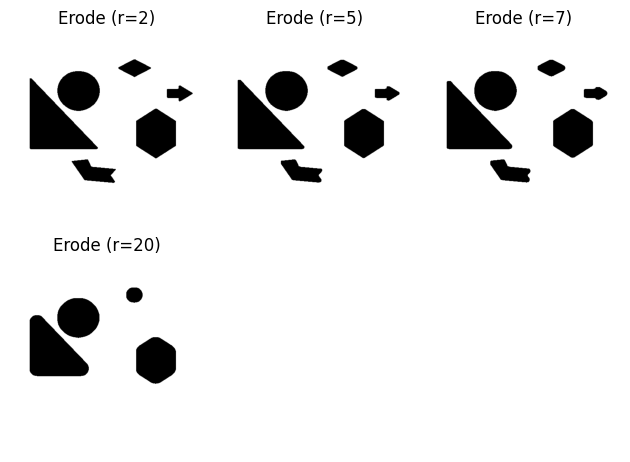

In [15]:
image = cv2.imread('./img/FIG_512.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
r_list = [2, 5, 7, 20]

for i, r in enumerate(r_list, 1):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * r, 2 * r))
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    plt.subplot(2, 3, i)
    plt.imshow(closed_image, cmap='gray')
    plt.title(f'Erode (r={r})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Erozja i Dylacja RGB

## Erozja dla RGB

$$
L'(m,n)=min_{m_i, n_i \in B(m,n)} (L(m_i,n_i))
$$

## Dylacja dla RGB

$$
L'(m,n)=max_{m_i, n_i \in B(m,n)} (L(m_i,n_i))
$$

## Zadanie 8 (2 punkty)
Proszę wykonać erozję i dylatacją na obrazie Leny (format RGB) z elementami strukturalnym:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$



In [16]:
lena = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_COLOR)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype = np.uint8)
eroded_lena = cv2.erode(lena, kernel)
dilated_lena = cv2.dilate(lena, kernel)

cv2.imshow("lena", lena)
cv2.imshow("eroded lena", eroded_lena)
cv2.imshow("dilated lena",dilated_lena)

cv2.waitKey(50)
cv2.destroyAllWindows()